In [ ]:
%load_ext autoreload
%autoreload
import importlib
from SOAEpeaks import load_df
import phaseco as pc
from phaseco import *
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
importlib.reload(pc)
import ipywidgets as widgets
from IPython.display import display
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = load_df(laptop=True, dfs_to_load=["Curated Data"])


Loading Curated Data
Combining into one Dataframe!


In [4]:
wf = df[df['species'] == 'Anolis'].iloc[0]['wf']
wf_title = df[df['species'] == 'Anolis'].iloc[0]['filepath'].split('\\')[-1]
del df

In [5]:
# Downsample in time
ds_factor = 1
wf_ds = wf[::ds_factor]
fs = int(44100/ds_factor)

# Crop waveform
crop_factor = 1
wf_cropped = wf_ds[0:int(len(wf_ds)/crop_factor)]

xi = 0.0025
tau = 0.05

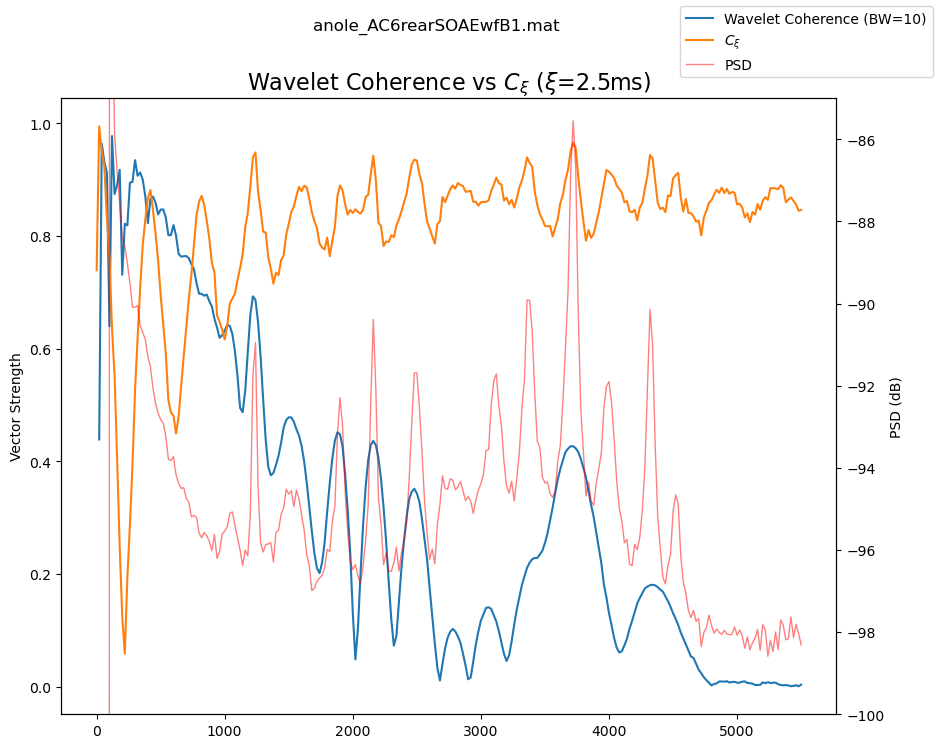

In [ ]:

"Wavelet Coherence Plot"
f, C_xi = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg")
f, psd = pc.get_welch(wf=wf_cropped, fs=fs, tau=tau, xi=xi)

# f_cwt = np.fft.rfftfreq(int(tau*fs), d=1/fs)[1:] # First bin has been dropped
# wav_coherence_smallbw = pc.get_wavelet_coherence(wf=wf_cropped, fs=fs, f=f_cwt, fb=1, xi=xi)
wav_coherence_medbw = pc.get_wavelet_coherence(wf=wf_cropped, fs=fs, f=f_cwt, fb=10, xi=xi)
wav_coherence_bigbw = pc.get_wavelet_coherence(wf=wf_cropped, fs=fs, f=f_cwt, fb=100, xi=xi)

plt.figure(figsize=(10, 8))
plt.title(r"Wavelet Coherence vs $C_{\xi}$ ($\xi$=" + f"{xi*1000}ms)", fontsize=16)
plt.suptitle(wf_title, fontsize=12)
plt.plot(f_cwt, wav_coherence_medbw, label=r'Wavelet Coherence (BW=10)')
plt.plot(f, C_xi, label=r'$C_{\xi}$')
# plt.plot(f_cwt, wav_coherence_bigbw, label=r'Wavelet Coherence (BW=100)')
plt.ylabel("Vector Strength")
ax2 = plt.twinx()
ax2.plot(f, 10*np.log10(psd), color='red', label='PSD', alpha=0.5, lw=1)
ax2.set_ylabel("PSD (dB)")
ax2.set_ylim(-100, -85)
plt.gcf().legend()
plt.show()

In [6]:
"C_xi^sigma comparison"
f, psd = pc.get_welch(wf=wf_cropped, fs=fs, tau=tau, xi=xi)
f, C_xi = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg")
f, C_xi_gauss_smallSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, sigma=0.0001, ref_type="next_seg")
f, C_xi_gauss_medSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, sigma=0.001, ref_type="next_seg")
f, C_xi_gauss_bigSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, sigma=0.01, ref_type="next_seg")
f, C_xi_gauss_hugeSTD = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, sigma=0.1, ref_type="next_seg")



plt.figure(figsize=(14, 6))
plt.suptitle(wf_title, fontsize=12)
plt.title(r"Coherence Measures ($\xi$=" + f"{xi*1000}ms, " + r"$\tau$=" + f"{tau*1000}ms)", fontsize=16)
# plt.plot(f_cwt, wav_coherence_medbw, label=r'Wavelet Coherence')
plt.plot(f, C_xi, label=r'$C_{\xi}$')
plt.plot(f, C_xi_gauss_smallSTD, label=r'$C_{\xi}^{\sigma}, \sigma=0.0001s$', alpha=0.3)
plt.plot(f, C_xi_gauss_medSTD, label=r'$C_{\xi}^{\sigma}, \sigma=0.001s$')
plt.plot(f, C_xi_gauss_bigSTD, label=r'$C_{\xi}^{\sigma}, \sigma=0.01s$')
plt.plot(f, C_xi_gauss_hugeSTD, label=r'$C_{\xi}^{\sigma}, \sigma=0.1s$')
ax2 = plt.twinx()
ax2.plot(f, 10*np.log10(psd), color='black', label='PSD', alpha=0.5, lw=1)
ax2.set_ylabel("PSD (dB)")
ax2.set_ylim(-110, -85)
plt.xlim(0, 5000)
plt.ylabel("Vector Strength")
plt.gcf().legend()
plt.show()

KeyboardInterrupt: 

In [49]:
# Compute everything
xi = 0.0025
tau = 0.05
f, psd = pc.get_welch(wf=wf_cropped, fs=fs, tau=tau, xi=xi)
f, C_xi = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg")

In [59]:
sigmas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019,0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.03, 0.04, 0.05, 0.1]
# coherence_dict = {sigma: pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, sigma=sigma, ref_type="next_seg")[1] for sigma in sigmas}

In [58]:
new_sigmas = []
for sigma in new_sigmas:
    coherence_dict.update({sigma: pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, sigma=sigma, ref_type="next_seg")[1]})
# sigmas = np.concatenate([sigmas, new_sigmas], axis=0)


In [65]:
# with open('coherence_dict.pkl', 'wb') as file:
#     pickle.dump(coherence_dict, file)
with open('coherence_dict.pkl', 'rb') as file:
    coherence_dict = pickle.load(file)
    print(coherence_dict.keys())

dict_keys([0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.006, 0.007, 0.008, 0.009, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.03, 0.04, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019])


interactive(children=(SelectionSlider(continuous_update=False, description='Sigma', options=(0.0001, 0.0002, 0…

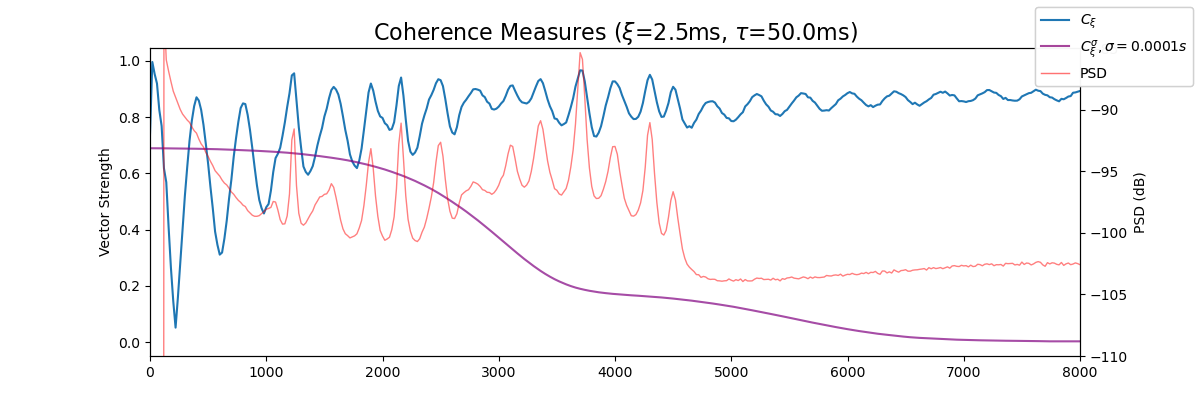

In [61]:


# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()

ax1.set_title(r"Coherence Measures ($\xi$=" + f"{xi*1000}ms, " + r"$\tau$=" + f"{tau*1000}ms)", fontsize=16)
ax1.set_xlim(0, 8000)
ax1.set_ylabel("Vector Strength")
ax2.set_ylabel("PSD (dB)")
ax2.set_ylim(-110, -85)

# Plot initial curves
line1, = ax1.plot(f, C_xi, label=r'$C_{\xi}$')
line2, = ax1.plot(f, coherence_dict[sigmas[0]], label=fr'$C_{{\xi}}^{{\sigma}}, \sigma={sigmas[0]}s$', alpha=0.7)
line_psd, = ax2.plot(f, 10*np.log10(psd), color='red', label='PSD', alpha=0.5, lw=1)

fig.legend()

# Function to update the plot
def update_plot(sigma):
    line2.set_ydata(coherence_dict[sigma])
    line2.set_color('purple')
    line2.set_label(fr'$C_{{\xi}}^{{\sigma}}, \sigma={sigma}s$')
    fig.legend()  # Update legend
    fig.canvas.draw_idle()

# Create slider
sigma_slider = widgets.SelectionSlider(
    options=sigmas,
    value=sigmas[0],
    description="Sigma",
    continuous_update=False
)


# Interactive widget
display(widgets.interactive(update_plot, sigma=sigma_slider))
plt.show()

In [32]:
tau = 0.025
xi = tau
f, psd = pc.get_welch(wf=wf_cropped, fs=fs, tau=tau)
f, C_tau = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg")
f, C_tau_sigma = pc.get_coherence(wf=wf_cropped, fs=fs, tau=tau, xi=xi, ref_type="next_seg", sigma=0.001)

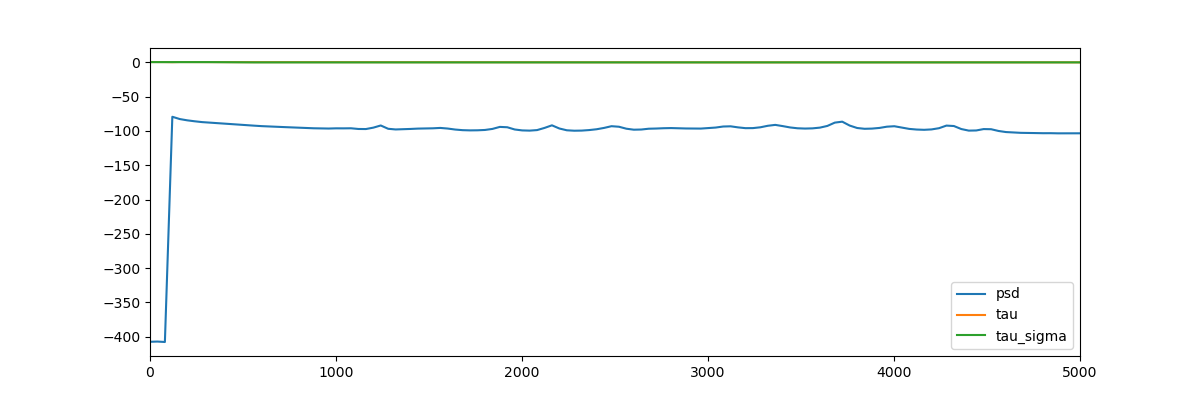

In [ ]:
plt.figure(figsize=(12, 4))
ax = plt.gca()
ax2 = ax.
plt.plot(f, C_tau, label='tau')
plt.plot(f, C_tau_sigma, label='tau_sigma')
plt.xlim(0, 5000)
plt.legend()
plt.show()

(551,)


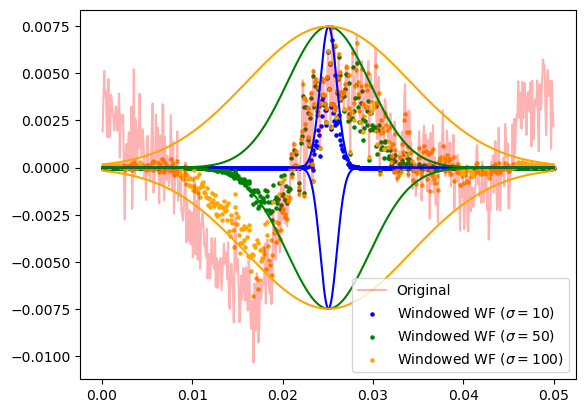

In [ ]:
"Gaussian Sigma Visualization"
tau = 0.050
tauS = int(tau*fs)
wf_seg = wf_cropped[0:tauS]
print(wf_seg.shape)
t = np.arange(1/fs, tau, 1/fs)

plt.plot(t, wf_seg, label="Original", color='red', alpha=0.3)
for sigma, color in zip([10, 50, 100], ['blue', 'green', 'orange']):
    window = gaussian(tauS, sigma, sym=False)
    wf_win = wf_seg*window
    plt.plot(t, window*np.max(wf_seg), color=color)
    plt.plot(t, -window*np.max(wf_seg), color=color)
    plt.scatter(t, wf_win, s=5, label=f"Windowed WF ($\sigma={sigma}$)", color=color)

plt.legend()
plt.show()

In [ ]:
# "Wavelet-gram"
# # Plot the wavelet coefficients
# plt.figure(figsize=(10, 6))
# t_ax_ds = 10
# c = np.abs(cwt)[::t_ax_ds, ::]
# plt.imshow(np.abs(c), extent=[f_cwt[0], f_cwt[-1], 0, len(wf_cropped)/fs], 
#            cmap='viridis', aspect='auto', vmin=0, vmax=abs(c).max())
# plt.colorbar(label='Magnitude')
# plt.ylabel('Time [s]')
# plt.xlabel('Frequency')
# plt.title('Anolis CWT Magnitudes')
# plt.show()

# "Spectrogram"
# tau = 0.05
# xi = 0.0025
# f_stft, stft = get_stft(wf=wf_cropped, fs=fs, tau=tau, xi=xi)
# f_min = f_cwt[0]
# f_max = f_cwt[-1]
# f_min_idx = (np.abs(f_stft - f_min)).argmin()  # find index of closest value to f - f_min
# f_max_idx = (np.abs(f_stft - f_max)).argmin()  # find index of closest value to f - f_max
# f_stft = f_stft[f_min_idx:f_max_idx]
# stft = stft[:, f_min_idx:f_max_idx]

# c_spec = np.abs(stft)
# plt.figure(figsize=(10, 6))
# plt.imshow(np.abs(c_spec), extent=[f_stft[0], f_stft[-1], 0, len(wf_cropped)/fs - tau], 
#            cmap='viridis', aspect='auto', vmin=0, vmax=abs(c_spec).max())
# plt.colorbar(label='Magnitude')
# plt.ylabel('Time [s]')
# plt.xlabel('Frequency')
# plt.title('Anolis STFT Magnitudes')
# plt.show()
